In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("part_1.csv")
df2 = pd.read_csv("part_2.csv")
df3 = pd.read_csv("part_3.csv")
df4 = pd.read_csv("part_4.csv")
df5 = pd.read_csv("part_5.csv")
df6 = pd.read_csv("part_6.csv")
df7 = pd.read_csv("part_7.csv")
df8 = pd.read_csv("part_8.csv")
df9 = pd.read_csv("part_9.csv")
df10 = pd.read_csv("part_10.csv")

In [9]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]).reset_index(drop=True)

In [10]:
df.columns

Index(['category', 'name', 'thc', 'cbd', 'price', 'weight', 'url',
       'Store Name', 'Number Reviews', 'Avg Rating', 'Phone Number',
       'Licenses', 'Address', 'Medical_ID?', 'Adult-Use_ID?', 'Dispensary',
       'In-store purchases only', 'Order online',
       'Supports the Black community', 'State', 'Medical Store?',
       'Recreational Store?'],
      dtype='object')

In [11]:
products = list(df.groupby('category').count().name.sort_values()[-10:].index)[::-1]

In [49]:
df.groupby('category').count().name.sort_values()[-10:]

category
INFUSED PRE ROLL     54515
DISPOSABLE           57565
GEAR                 70156
ACCESSORIES          91341
GUMMIES             120925
EDIBLES             151190
PRE ROLL            158899
CARTRIDGE           166093
CONCENTRATES        192001
FLOWER              317121
Name: name, dtype: int64

In [12]:
rating_by_category = {}
for product in products:
    rating = round(df.query('category == @product')['Avg Rating'].mean(), 2)
    rating_by_category.update({product: rating})

<BarContainer object of 10 artists>

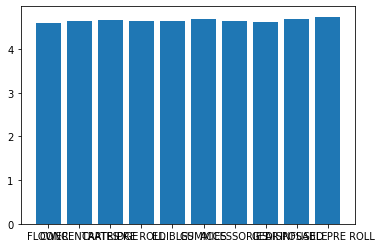

In [13]:
plt.bar(rating_by_category.keys(), rating_by_category.values())

In [50]:
df_price = df.query("price != 'None'")

In [51]:
df_price['price'] = df_price.price.apply(lambda x: float(x.strip("$")))

/var/folders/wv/4b7pf7vs3bjf2k7h3lnp4f600000gn/T/ipykernel_6544/2830272342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['price'] = df_price.price.apply(lambda x: float(x.strip("$")))


In [52]:
price_by_category = {}
price=0
for product in products:
    price = round(df_price.query('category == @product')['price'].mean(), 2)
    price_by_category.update({product: price})

<BarContainer object of 10 artists>

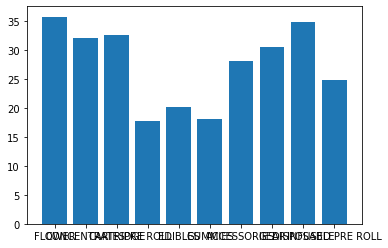

In [53]:
plt.bar(price_by_category.keys(), price_by_category.values())

In [59]:
flower = df_price.query('category == "FLOWER"')
price_flower_st = pd.DataFrame(flower.groupby('State').price.mean())

concentrate = df_price.query('category == "CONCENTRATES"')
price_concentrate_st = pd.DataFrame(concentrate.groupby('State').price.mean())

cartridge = df_price.query('category == "CARTRIDGE"')
price_cartridge_st = pd.DataFrame(cartridge.groupby('State').price.mean())

preroll = df_price.query('category == "PRE ROLL"')
price_preroll_st = pd.DataFrame(preroll.groupby('State').price.mean())

edibles = df_price.query('category == "EDIBLES"')
price_edibles_st = pd.DataFrame(edibles.groupby('State').price.mean())

gummies = df_price.query('category == "GUMMIES"')
price_gummies_st = pd.DataFrame(gummies.groupby('State').price.mean())

In [67]:
price_flower_st.to_csv('price_flower_by_state.csv')
price_concentrate_st.to_csv('price_concentrate_by_state.csv')
price_cartridge_st.to_csv('price_cartridge_by_state.csv')
price_preroll_st.to_csv('price_preroll_by_state.csv')
price_edibles_st.to_csv('price_edibles_by_state.csv')
price_gummies_st.to_csv('price_gummies_by_state.csv')